Dataset : income prediction
accuracy : 84%
front-end created : no

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [91]:
df = pd.read_csv('adult.csv')

In [92]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [93]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [94]:
df[df == '?'] = np.nan

In [95]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [96]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
df.isnull().sum()

C:\Users\Madhav\AppData\Local\Temp\ipykernel_470412\3206797515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [97]:
X = df.drop('income', axis=1)
y = df['income']

In [98]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [99]:
category_columns = X.select_dtypes(include='object').columns
print(category_columns)
for col in category_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')


In [100]:
lee = LabelEncoder()
y = lee.fit_transform(y)
y, lee.classes_

(array([0, 0, 0, ..., 1, 0, 0]), array(['<=50K', '>50K'], dtype=object))

In [101]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1.0, gamma='auto')

In [104]:
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [105]:
y_pred = svc.predict(X_test)

In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[7017  412]
 [1058 1282]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7429
           1       0.76      0.55      0.64      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

0.8495240045040434


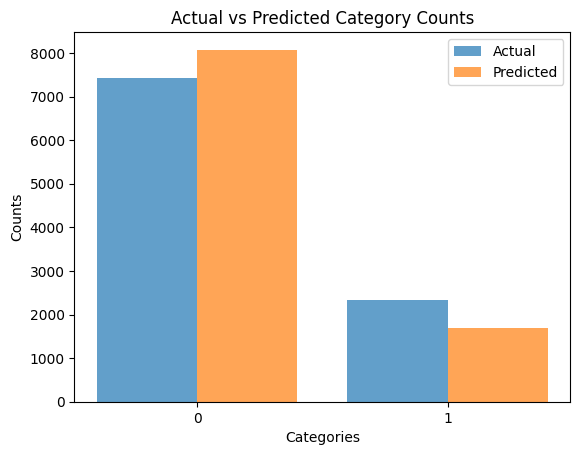

In [107]:
# Count occurrences for each category in actual and predicted labels
actual_counts = pd.Series(y_test).value_counts(sort=False)
pred_counts = pd.Series(y_pred).value_counts(sort=False)

# Align index if categories are missing in predictions/actual
categories = sorted(set(actual_counts.index).union(set(pred_counts.index)))
actual_counts = actual_counts.reindex(categories, fill_value=0)
pred_counts = pred_counts.reindex(categories, fill_value=0)

# Plot
bar_width = 0.4
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', align='center', alpha=0.7)
plt.bar([p + bar_width for p in x], pred_counts, width=bar_width, label='Predicted', align='center', alpha=0.7)

plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Actual vs Predicted Category Counts")
plt.xticks([p + bar_width/2 for p in x], categories)
plt.legend()
plt.show()
